In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [443]:
df = pd.read_csv('vehicle_data.csv')
df.head()

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2021-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...","Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km","Kurunegala City, Kurunegala",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2021-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo","Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km","Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2021-09-16 13:16:00
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo","Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km","Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...,Carzone Lanka,Member,2021-09-30 10:12:00
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha","Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km","Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Shine Music Center,Member,2021-09-30 21:50:00


In [444]:
df.shape

(30495, 19)

In [445]:
len(df.Model.unique())

541

Data cleaning

In [446]:
df1 = df.drop(['Title','Sub_title','Location','Description','Post_URL','Seller_name','Seller_type',
               'published_date'], axis=1)
df1.head()

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage
0,"Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km"
1,"Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km"
2,"Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km"
3,"Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km"
4,"Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km"


In [447]:
len(df1.Model.unique())

541

In [448]:
df1.Model = df1.Model.apply(lambda x: x.strip())
brand_stats = df1.groupby('Model')['Model'].agg('count').sort_values(ascending=False)
brand_stats

Model
Alto       1342
Vitz       1245
Sunny       961
Corolla     915
Axio        899
           ... 
Towny         1
Junior        1
K900          1
Karoq         1
Ioniq         1
Name: Model, Length: 541, dtype: int64

In [449]:
len(brand_stats[brand_stats<20])

340

In [450]:
df.Edition.unique()

array(['Limited', 'Fully Loaded', 'GT New Face 2wd', ...,
       'FB14 1999 AUTO', 'TX SECOND OWNER', 'Vitz Safety new'],
      dtype=object)

In [451]:
ed_stats = df1.groupby('Edition')['Edition'].agg('count').sort_values(ascending=False)
ed_stats

Edition
G Grade                339
G Superior             279
Toyota                 264
Safety                 165
-                      164
                      ... 
G Grade Pearl White      1
G Grade New Face         1
G Grade Ltd              1
G Grade Japanese         1
JS                       1
Name: Edition, Length: 9065, dtype: int64

In [452]:
len(ed_stats[ed_stats<20])

8928

In [453]:
df1.head()

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage
0,"Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km"
1,"Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km"
2,"Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km"
3,"Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km"
4,"Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km"


In [454]:
df1['Price'] = df1.Price.apply(lambda x: x.split(' ')[1])
df1['Mileage'] = df1.Mileage.apply(lambda x: x.split(' ')[0])
df1['Capacity'] = df1.Capacity.apply(lambda x: x.split(' ')[0])

In [455]:
df1.head()

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage
0,"12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500","37,000"
1,"16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200","42,000"
2,"17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200","15,000"
3,"13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200","21,000"
4,"33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700","57,000"


In [456]:
df1['Price'] = df1.Price.apply(lambda x: float(x.replace(',','')))

In [457]:
df1['Mileage'] = df1.Mileage.apply(lambda x: float(x.replace(',','')))
df1['Capacity'] = df1.Capacity.apply(lambda x: float(x.replace(',','')))

In [458]:
df1.head()

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage
0,12900000.0,Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,1500.0,37000.0
1,16250000.0,Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,2200.0,42000.0
2,17000000.0,Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,1200.0,15000.0
3,13000000.0,Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,1200.0,21000.0
4,33500000.0,Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700.0,57000.0


In [459]:
df1.isnull().sum()

Price              0
Brand              0
Model              0
Edition         7539
Year               0
Condition          0
Transmission       0
Body            2726
Fuel               0
Capacity           0
Mileage            0
dtype: int64

In [460]:
df1.Body.unique()

array(['SUV / 4x4', 'Saloon', nan, 'Hatchback', 'MPV', 'Convertible',
       'CoupÃ©/Sports', 'Station wagon'], dtype=object)

In [461]:
df1.Price.describe()

count    3.049500e+04
mean     8.179997e+06
std      1.024878e+07
min      9.900000e+02
25%      2.650000e+06
50%      5.090000e+06
75%      9.200000e+06
max      2.100000e+08
Name: Price, dtype: float64

In [462]:
df1.sort_values(by='Price', ascending=False).head(10)

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage
12344,210000000.0,Mitsubishi,Montero,GLS,2015,Used,Automatic,SUV / 4x4,Diesel,3200.0,80000.0
13250,179000000.0,Toyota,Premio,1st owner 2020,2020,Used,Automatic,Saloon,Petrol,1500.0,18000.0
6626,129500000.0,Land Rover,Range Rover,SV Autobiography,2019,New,Automatic,SUV / 4x4,Petrol,2000.0,200.0
18546,126500000.0,Land Rover,Range Rover,SV Autobiography,2019,New,Automatic,SUV / 4x4,Petrol,2000.0,200.0
20219,126500000.0,Land Rover,Range Rover,SV Autobiography,2019,New,Automatic,SUV / 4x4,Petrol,2000.0,200.0
26424,118000000.0,Land Rover,Range Rover,NaN,2020,New,Automatic,SUV / 4x4,Diesel,2000.0,0.0
9454,115000000.0,Land Rover,Range Rover,SV,2019,New,Automatic,SUV / 4x4,Petrol,2000.0,200.0
4829,110000000.0,Land Rover,Range Rover,Autobiography LWB,2019,Used,Automatic,Station wagon,Petrol,2000.0,10000.0
29077,98500000.0,Land Rover,Range Rover,SV Autobiography,2019,New,Automatic,SUV / 4x4,Petrol,2000.0,200.0
5701,98500000.0,Land Rover,Range Rover,Autobiography LW,2018,Used,Tiptronic,SUV / 4x4,Petrol,2000.0,18500.0


In [463]:
import seaborn as sns

<AxesSubplot:>

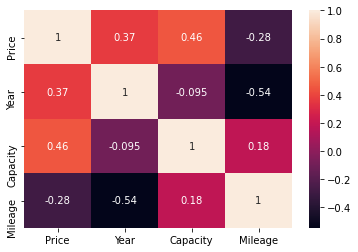

In [464]:
sns.heatmap(df1.corr(),annot=True)

In [465]:
df1.head()

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage
0,12900000.0,Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,1500.0,37000.0
1,16250000.0,Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,2200.0,42000.0
2,17000000.0,Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,1200.0,15000.0
3,13000000.0,Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,1200.0,21000.0
4,33500000.0,Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700.0,57000.0


In [466]:
df1['Car_model'] = df['Brand'] + ' ' + df['Model']

In [467]:
df1.head()

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Car_model
0,12900000.0,Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,1500.0,37000.0,Honda Vezel
1,16250000.0,Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,2200.0,42000.0,Jaguar XF
2,17000000.0,Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,1200.0,15000.0,Toyota CHR
3,13000000.0,Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,1200.0,21000.0,Toyota CHR
4,33500000.0,Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,2700.0,57000.0,Toyota Land Cruiser Prado


In [468]:
df2 = df1.drop(['Brand','Model','Edition'], axis=1)
df2.head()

,Price,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Car_model
0,12900000.0,2017,Used,Automatic,SUV / 4x4,Hybrid,1500.0,37000.0,Honda Vezel
1,16250000.0,2013,Used,Automatic,Saloon,Diesel,2200.0,42000.0,Jaguar XF
2,17000000.0,2020,Used,Automatic,SUV / 4x4,Petrol,1200.0,15000.0,Toyota CHR
3,13000000.0,2017,Used,Automatic,SUV / 4x4,Petrol,1200.0,21000.0,Toyota CHR
4,33500000.0,2015,Used,Automatic,SUV / 4x4,Petrol,2700.0,57000.0,Toyota Land Cruiser Prado


In [469]:
df3 = df2[['Car_model','Year','Condition','Body','Transmission','Fuel','Capacity','Mileage','Price']]

In [470]:
df3.head()

,Car_model,Year,Condition,Body,Transmission,Fuel,Capacity,Mileage,Price
0,Honda Vezel,2017,Used,SUV / 4x4,Automatic,Hybrid,1500.0,37000.0,12900000.0
1,Jaguar XF,2013,Used,Saloon,Automatic,Diesel,2200.0,42000.0,16250000.0
2,Toyota CHR,2020,Used,SUV / 4x4,Automatic,Petrol,1200.0,15000.0,17000000.0
3,Toyota CHR,2017,Used,SUV / 4x4,Automatic,Petrol,1200.0,21000.0,13000000.0
4,Toyota Land Cruiser Prado,2015,Used,SUV / 4x4,Automatic,Petrol,2700.0,57000.0,33500000.0


In [471]:
df3['Car_model'] = df3['Car_model'].apply(lambda x: x.strip())

In [472]:
df3.head()

,Car_model,Year,Condition,Body,Transmission,Fuel,Capacity,Mileage,Price
0,Honda Vezel,2017,Used,SUV / 4x4,Automatic,Hybrid,1500.0,37000.0,12900000.0
1,Jaguar XF,2013,Used,Saloon,Automatic,Diesel,2200.0,42000.0,16250000.0
2,Toyota CHR,2020,Used,SUV / 4x4,Automatic,Petrol,1200.0,15000.0,17000000.0
3,Toyota CHR,2017,Used,SUV / 4x4,Automatic,Petrol,1200.0,21000.0,13000000.0
4,Toyota Land Cruiser Prado,2015,Used,SUV / 4x4,Automatic,Petrol,2700.0,57000.0,33500000.0


In [473]:
df3.shape

(30495, 9)

In [474]:
df3.isnull().sum()

Car_model          0
Year               0
Condition          0
Body            2726
Transmission       0
Fuel               0
Capacity           0
Mileage            0
Price              0
dtype: int64

In [475]:
df4 = df3.dropna()
df4.shape

(27769, 9)

In [476]:
df4.Body.unique()

array(['SUV / 4x4', 'Saloon', 'Hatchback', 'MPV', 'Convertible',
       'CoupÃ©/Sports', 'Station wagon'], dtype=object)

In [477]:
df4.Body = df4.Body.apply(lambda x: x.split(' ')[0])

C:\Users\SAHAN\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [478]:
df4.Body = df4.Body.apply(lambda x: x.replace('CoupÃ©/Sports','Sports'))

In [479]:
df4.Body.unique()

array(['SUV', 'Saloon', 'Hatchback', 'MPV', 'Convertible', 'Sports',
       'Station'], dtype=object)

In [480]:
df4.head()

,Car_model,Year,Condition,Body,Transmission,Fuel,Capacity,Mileage,Price
0,Honda Vezel,2017,Used,SUV,Automatic,Hybrid,1500.0,37000.0,12900000.0
1,Jaguar XF,2013,Used,Saloon,Automatic,Diesel,2200.0,42000.0,16250000.0
2,Toyota CHR,2020,Used,SUV,Automatic,Petrol,1200.0,15000.0,17000000.0
3,Toyota CHR,2017,Used,SUV,Automatic,Petrol,1200.0,21000.0,13000000.0
4,Toyota Land Cruiser Prado,2015,Used,SUV,Automatic,Petrol,2700.0,57000.0,33500000.0


In [481]:
df4.Year.dtype

dtype('int64')

In [482]:
len(df4['Car_model'].unique())

590

Feature engineering

In [483]:
car_stats = df4.groupby('Car_model')['Car_model'].agg('count').sort_values(ascending=False)
car_stats

Car_model
Toyota Vitz              1127
Suzuki Alto              1049
Nissan Sunny              898
Toyota Corolla            843
Toyota Axio               835
                         ... 
Ford Mondeo                 1
Mercedes Benz SLK 200       1
Lexus LS400                 1
Kia K900                    1
Isuzu Panther               1
Name: Car_model, Length: 590, dtype: int64

In [484]:
car_stats_less_than_10 = car_stats[car_stats<10]
len(car_stats_less_than_10)

302

In [485]:
df4['Car_model'] = df4['Car_model'].apply(lambda x: 'other' if x in car_stats_less_than_10 else x)
len(df4['Car_model'].unique())

<ipython-input-485-8a387e447394>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Car_model'] = df4['Car_model'].apply(lambda x: 'other' if x in car_stats_less_than_10 else x)


289

In [486]:
df4.shape

(27769, 9)

In [487]:
other = df4.groupby('Car_model')['Car_model'].agg('count').sort_values(ascending=False)
other

Car_model
Toyota Vitz             1127
other                   1112
Suzuki Alto             1049
Nissan Sunny             898
Toyota Corolla           843
                        ... 
Morris Oxford             10
Toyota Platz              10
Mahindra Other Model      10
Mitsubishi RVR            10
Honda HR-V                10
Name: Car_model, Length: 289, dtype: int64

In [488]:
df4.Price.describe()

count    2.776900e+04
mean     8.299239e+06
std      1.044729e+07
min      9.900000e+02
25%      2.650000e+06
50%      5.150000e+06
75%      9.350000e+06
max      2.100000e+08
Name: Price, dtype: float64

Outlier removal

In [489]:
def remove_price_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Car_model'):
        m = np.mean(subdf.Price)
        std = np.std(subdf.Price)
        new_df = subdf[(subdf.Price>(m-std)) & (subdf.Price<=(m+std))]
        df_out = pd.concat([df_out,new_df], ignore_index=True)
    return df_out

df5 = remove_price_outliers(df4)

In [490]:
df5.shape

(20408, 9)

In [491]:
df5.Price.describe()

count    2.040800e+04
mean     7.571970e+06
std      8.893863e+06
min      1.100000e+05
25%      2.450000e+06
50%      4.975000e+06
75%      8.750000e+06
max      8.750000e+07
Name: Price, dtype: float64

In [492]:
df5[df5.Price < 150000]

,Car_model,Year,Condition,Body,Transmission,Fuel,Capacity,Mileage,Price
8936,Other brand Other model,2007,Used,Hatchback,Manual,Petrol,200.0,85000.0,110000.0


In [493]:
df5['Car_model'] = df5.Car_model.apply(lambda x: x.replace('Other brand Other model','other'))

Text(0, 0.5, 'Count')

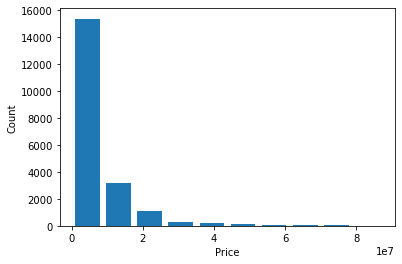

In [494]:

plt.hist(df5.Price, rwidth=.8)
plt.xlabel('Price')
plt.ylabel('Count')

In [495]:
df5.head()

,Car_model,Year,Condition,Body,Transmission,Fuel,Capacity,Mileage,Price
0,Audi A1,2017,Used,Hatchback,Automatic,Petrol,990.0,26000.0,8975000.0
1,Audi A1,2017,Used,Hatchback,Automatic,Petrol,1000.0,75000.0,9875000.0
2,Audi A1,2018,Used,Hatchback,Tiptronic,Petrol,1000.0,65000.0,9700000.0
3,Audi A1,2016,Used,Hatchback,Tiptronic,Petrol,990.0,44000.0,9590000.0
4,Audi A1,2015,Used,Hatchback,Automatic,Petrol,2000.0,35000.0,8950000.0


In [496]:
dummies1 = pd.get_dummies(df5.Car_model)
dummies1.head(3)

,Audi A1,Audi A3,Audi A4,Audi A5,Audi A6,Audi A8,Audi Q2,Audi Q3,Audi Q7,Austin Mini Cooper,...,Toyota Vitz,Toyota Voxy,Toyota Wigo,Toyota Yaris,Volkswagen Beetle,Volkswagen Golf,Volkswagen Passat,Zotye Nomad,Zotye Z100,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [497]:
df6 = pd.concat([df5,dummies1.drop('other', axis=1)], axis=1)
df6.head(3)

,Car_model,Year,Condition,Body,Transmission,Fuel,Capacity,Mileage,Price,Audi A1,...,Toyota Vios,Toyota Vitz,Toyota Voxy,Toyota Wigo,Toyota Yaris,Volkswagen Beetle,Volkswagen Golf,Volkswagen Passat,Zotye Nomad,Zotye Z100
0,Audi A1,2017,Used,Hatchback,Automatic,Petrol,990.0,26000.0,8975000.0,1,...,0,0,0,0,0,0,0,0,0,0
1,Audi A1,2017,Used,Hatchback,Automatic,Petrol,1000.0,75000.0,9875000.0,1,...,0,0,0,0,0,0,0,0,0,0
2,Audi A1,2018,Used,Hatchback,Tiptronic,Petrol,1000.0,65000.0,9700000.0,1,...,0,0,0,0,0,0,0,0,0,0


In [563]:
df6.Condition.unique()

array(['Used', 'Reconditioned', 'New'], dtype=object)

In [499]:
dummies2 = pd.get_dummies(df6.Condition)

In [597]:
df7 = pd.concat([df6,dummies2], axis=1)
df7.head(3)

,Car_model,Year,Condition,Body,Transmission,Fuel,Capacity,Mileage,Price,Audi A1,...,Toyota Wigo,Toyota Yaris,Volkswagen Beetle,Volkswagen Golf,Volkswagen Passat,Zotye Nomad,Zotye Z100,New,Reconditioned,Used
0,Audi A1,2017,Used,Hatchback,Automatic,Petrol,990.0,26000.0,8975000.0,1,...,0,0,0,0,0,0,0,0,0,1
1,Audi A1,2017,Used,Hatchback,Automatic,Petrol,1000.0,75000.0,9875000.0,1,...,0,0,0,0,0,0,0,0,0,1
2,Audi A1,2018,Used,Hatchback,Tiptronic,Petrol,1000.0,65000.0,9700000.0,1,...,0,0,0,0,0,0,0,0,0,1


In [598]:
dummies3 = pd.get_dummies(df7.Body)
df8 = pd.concat([df7,dummies3], axis=1)
df8.head(3)

,Car_model,Year,Condition,Body,Transmission,Fuel,Capacity,Mileage,Price,Audi A1,...,New,Reconditioned,Used,Convertible,Hatchback,MPV,SUV,Saloon,Sports,Station
0,Audi A1,2017,Used,Hatchback,Automatic,Petrol,990.0,26000.0,8975000.0,1,...,0,0,1,0,1,0,0,0,0,0
1,Audi A1,2017,Used,Hatchback,Automatic,Petrol,1000.0,75000.0,9875000.0,1,...,0,0,1,0,1,0,0,0,0,0
2,Audi A1,2018,Used,Hatchback,Tiptronic,Petrol,1000.0,65000.0,9700000.0,1,...,0,0,1,0,1,0,0,0,0,0


In [599]:
dummies4 = pd.get_dummies(df8.Transmission)
df9 = pd.concat([df8,dummies4.drop('Other transmission', axis=1)], axis=1)
df9.head(3)

,Car_model,Year,Condition,Body,Transmission,Fuel,Capacity,Mileage,Price,Audi A1,...,Convertible,Hatchback,MPV,SUV,Saloon,Sports,Station,Automatic,Manual,Tiptronic
0,Audi A1,2017,Used,Hatchback,Automatic,Petrol,990.0,26000.0,8975000.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Audi A1,2017,Used,Hatchback,Automatic,Petrol,1000.0,75000.0,9875000.0,1,...,0,1,0,0,0,0,0,1,0,0
2,Audi A1,2018,Used,Hatchback,Tiptronic,Petrol,1000.0,65000.0,9700000.0,1,...,0,1,0,0,0,0,0,0,0,1


In [600]:
dummies5 = pd.get_dummies(df8.Fuel)
df10 = pd.concat([df9,dummies5.drop('Other fuel type', axis=1)], axis=1)
df10.head(3)

,Car_model,Year,Condition,Body,Transmission,Fuel,Capacity,Mileage,Price,Audi A1,...,Sports,Station,Automatic,Manual,Tiptronic,CNG,Diesel,Electric,Hybrid,Petrol
0,Audi A1,2017,Used,Hatchback,Automatic,Petrol,990.0,26000.0,8975000.0,1,...,0,0,1,0,0,0,0,0,0,1
1,Audi A1,2017,Used,Hatchback,Automatic,Petrol,1000.0,75000.0,9875000.0,1,...,0,0,1,0,0,0,0,0,0,1
2,Audi A1,2018,Used,Hatchback,Tiptronic,Petrol,1000.0,65000.0,9700000.0,1,...,0,0,0,0,1,0,0,0,0,1


In [601]:
df11 = df10.drop(['Car_model','Condition','Body','Transmission','Fuel'],axis=1)
df11.head(3)

,Year,Capacity,Mileage,Price,Audi A1,Audi A3,Audi A4,Audi A5,Audi A6,Audi A8,...,Sports,Station,Automatic,Manual,Tiptronic,CNG,Diesel,Electric,Hybrid,Petrol
0,2017,990.0,26000.0,8975000.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2017,1000.0,75000.0,9875000.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2018,1000.0,65000.0,9700000.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [602]:
X = df11.drop('Price', axis=1)
y = df11['Price']

In [603]:
from sklearn.model_selection import train_test_split

In [604]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=10)

In [605]:
y_train

10905    4575000.0
13222    4290000.0
9903     2195000.0
11680    3850000.0
19153    5300000.0
           ...    
9372     9500000.0
7291      585000.0
17728    5400000.0
7293     1675000.0
17673    5650000.0
Name: Price, Length: 16326, dtype: float64

In [606]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9003753783561715

In [607]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

In [608]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.90362476, 0.91406782, 0.89858502, 0.9063133 , 0.90232901])

In [609]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X, y):
    models = {
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'Decision_tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
    for model_name, config in models.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores)

find_best_model(X, y)

,model,best_score,best_params
0,linear_regression,0.904984,{'normalize': False}
1,Decision_tree,0.908489,"{'criterion': 'mse', 'splitter': 'random'}"


In [611]:
df11.head(3)

,Year,Capacity,Mileage,Price,Audi A1,Audi A3,Audi A4,Audi A5,Audi A6,Audi A8,...,Sports,Station,Automatic,Manual,Tiptronic,CNG,Diesel,Electric,Hybrid,Petrol
0,2017,990.0,26000.0,8975000.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2017,1000.0,75000.0,9875000.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2018,1000.0,65000.0,9700000.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [612]:
df11['Audi A1'].dtype

dtype('uint8')

In [613]:
X.columns

Index(['Year', 'Capacity', 'Mileage', 'Audi A1', 'Audi A3', 'Audi A4',
       'Audi A5', 'Audi A6', 'Audi A8', 'Audi Q2',
       ...
       'Sports', 'Station', 'Automatic', 'Manual', 'Tiptronic', 'CNG',
       'Diesel', 'Electric', 'Hybrid', 'Petrol'],
      dtype='object', length=308)

In [614]:
X_train

,Year,Capacity,Mileage,Audi A1,Audi A3,Audi A4,Audi A5,Audi A6,Audi A8,Audi Q2,...,Sports,Station,Automatic,Manual,Tiptronic,CNG,Diesel,Electric,Hybrid,Petrol
10905,2017,650.0,25000.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
13222,2013,1490.0,72000.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9903,2014,800.0,89000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
11680,2017,660.0,77000.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
19153,2017,1000.0,37000.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,2016,2000.0,75000.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7291,1971,1590.0,105000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17728,2014,1800.0,90000.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7293,1991,1680.0,260000.0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [615]:
car_model_index = np.where(X.columns=='Toyota CHR')[0][0]
condtion_index = np.where(X.columns=='Used')[0][0]
body_index = np.where(X.columns=='SUV')[0][0]
trans_index = np.where(X.columns=='Automatic')[0][0]
fuel_index = np.where(X.columns=='Petrol')[0][0]
car_model_index
condtion_index

292

In [631]:
df5.Fuel.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other fuel type', 'CNG', 'Electric'],
      dtype=object)

In [617]:
def predict_price(car_model,condition,body,transmission,fuel,year,capacity,mileage):
    car_model_index = np.where(X.columns==car_model)[0][0]
    condtion_index = np.where(X.columns==condition)[0][0]
    body_index = np.where(X.columns==body)[0][0]
    trans_index = np.where(X.columns==transmission)[0][0]
    fuel_index = np.where(X.columns==fuel)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = year
    x[1] = capacity
    x[2] = mileage
    if car_model_index>0:
        x[car_model_index] = 1
    if condtion_index>0:
        x[condtion_index] = 1
    if body_index>0:
        x[body_index] = 1
    if trans_index>0:
        x[trans_index] = 1
    if fuel_index>0:
        x[fuel_index] = 1
    
    return lr.predict([x])[0]

In [637]:
predict_price('Toyota CHR','New','SUV','Automatic','Hybrid',2021,1200,0)

14325243.571533203

In [640]:
predict_price('Perodua Viva Elite','Used','Hatchback','Automatic','Petrol',2011,1000,118850.0)

2981107.600830078

In [620]:
df5[df5.Car_model=='Perodua Viva Elite']

,Car_model,Year,Condition,Body,Transmission,Fuel,Capacity,Mileage,Price
9008,Perodua Viva Elite,2010,Used,Hatchback,Automatic,Petrol,1000.0,64520.0,3295000.0
9009,Perodua Viva Elite,2011,Used,Hatchback,Automatic,Petrol,1000.0,118850.0,3150000.0
9010,Perodua Viva Elite,2011,Used,Hatchback,Automatic,Petrol,1000.0,160000.0,3100000.0
9011,Perodua Viva Elite,2011,Used,Hatchback,Manual,Petrol,1000.0,88000.0,2850000.0
9012,Perodua Viva Elite,2011,Used,Hatchback,Manual,Petrol,1000.0,65000.0,3075000.0
...,...,...,...,...,...,...,...,...,...
9101,Perodua Viva Elite,2012,Used,Hatchback,Automatic,Petrol,1000.0,101000.0,2520000.0
9102,Perodua Viva Elite,2011,Used,Hatchback,Automatic,Petrol,1000.0,65000.0,2665000.0
9103,Perodua Viva Elite,2012,Used,Hatchback,Automatic,Petrol,1000.0,88000.0,2725000.0
9104,Perodua Viva Elite,2011,Used,Hatchback,Automatic,Petrol,1000.0,40000.0,2750000.0


In [643]:
import pickle
with open('SL_car_price_prediction_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [644]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))